In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import os
import matplotlib.colors as mcolors

def geography(left, right, bottom, top):
    #
    resolution = 12
    #
    upperindex = (90-top)*resolution
    lowerindex = (90-bottom)*resolution
    leftindex = (180+left)*resolution
    rightindex = (180+right)*resolution
    #
    rgnshape = (lowerindex-upperindex, rightindex-leftindex)
    #
    img_extent = (left, right, bottom, top)
    
    return upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent

In [7]:
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'

population_path = f'{h08dir}/wsi/dat/population/population_threshold_world.npy'
population = np.load(population_path)

availability_path = f'{h08dir}/wsi/dat/availablewater/availablewater_threshold_world.npy'
availability = np.load(availability_path)

lonlat_path = f'{h08dir}/wsi/dat/population/population_m3cy_citylonlat.npy'
citylonlat = np.load(lonlat_path)

grid_path = f'{h08dir}/wsi/dat/population/population_m3cy_citygrid.npy'
citygrid = np.load(grid_path)
citygrid_masked = np.ma.masked_where(citygrid==0, citygrid)

In [8]:
#lonlat [city_num, cnt_lon, cnt_lat, cmy, un_pop, city_name, country, region]
#population [2160, 4320] person
#availability [2160, 4320] m3year-1

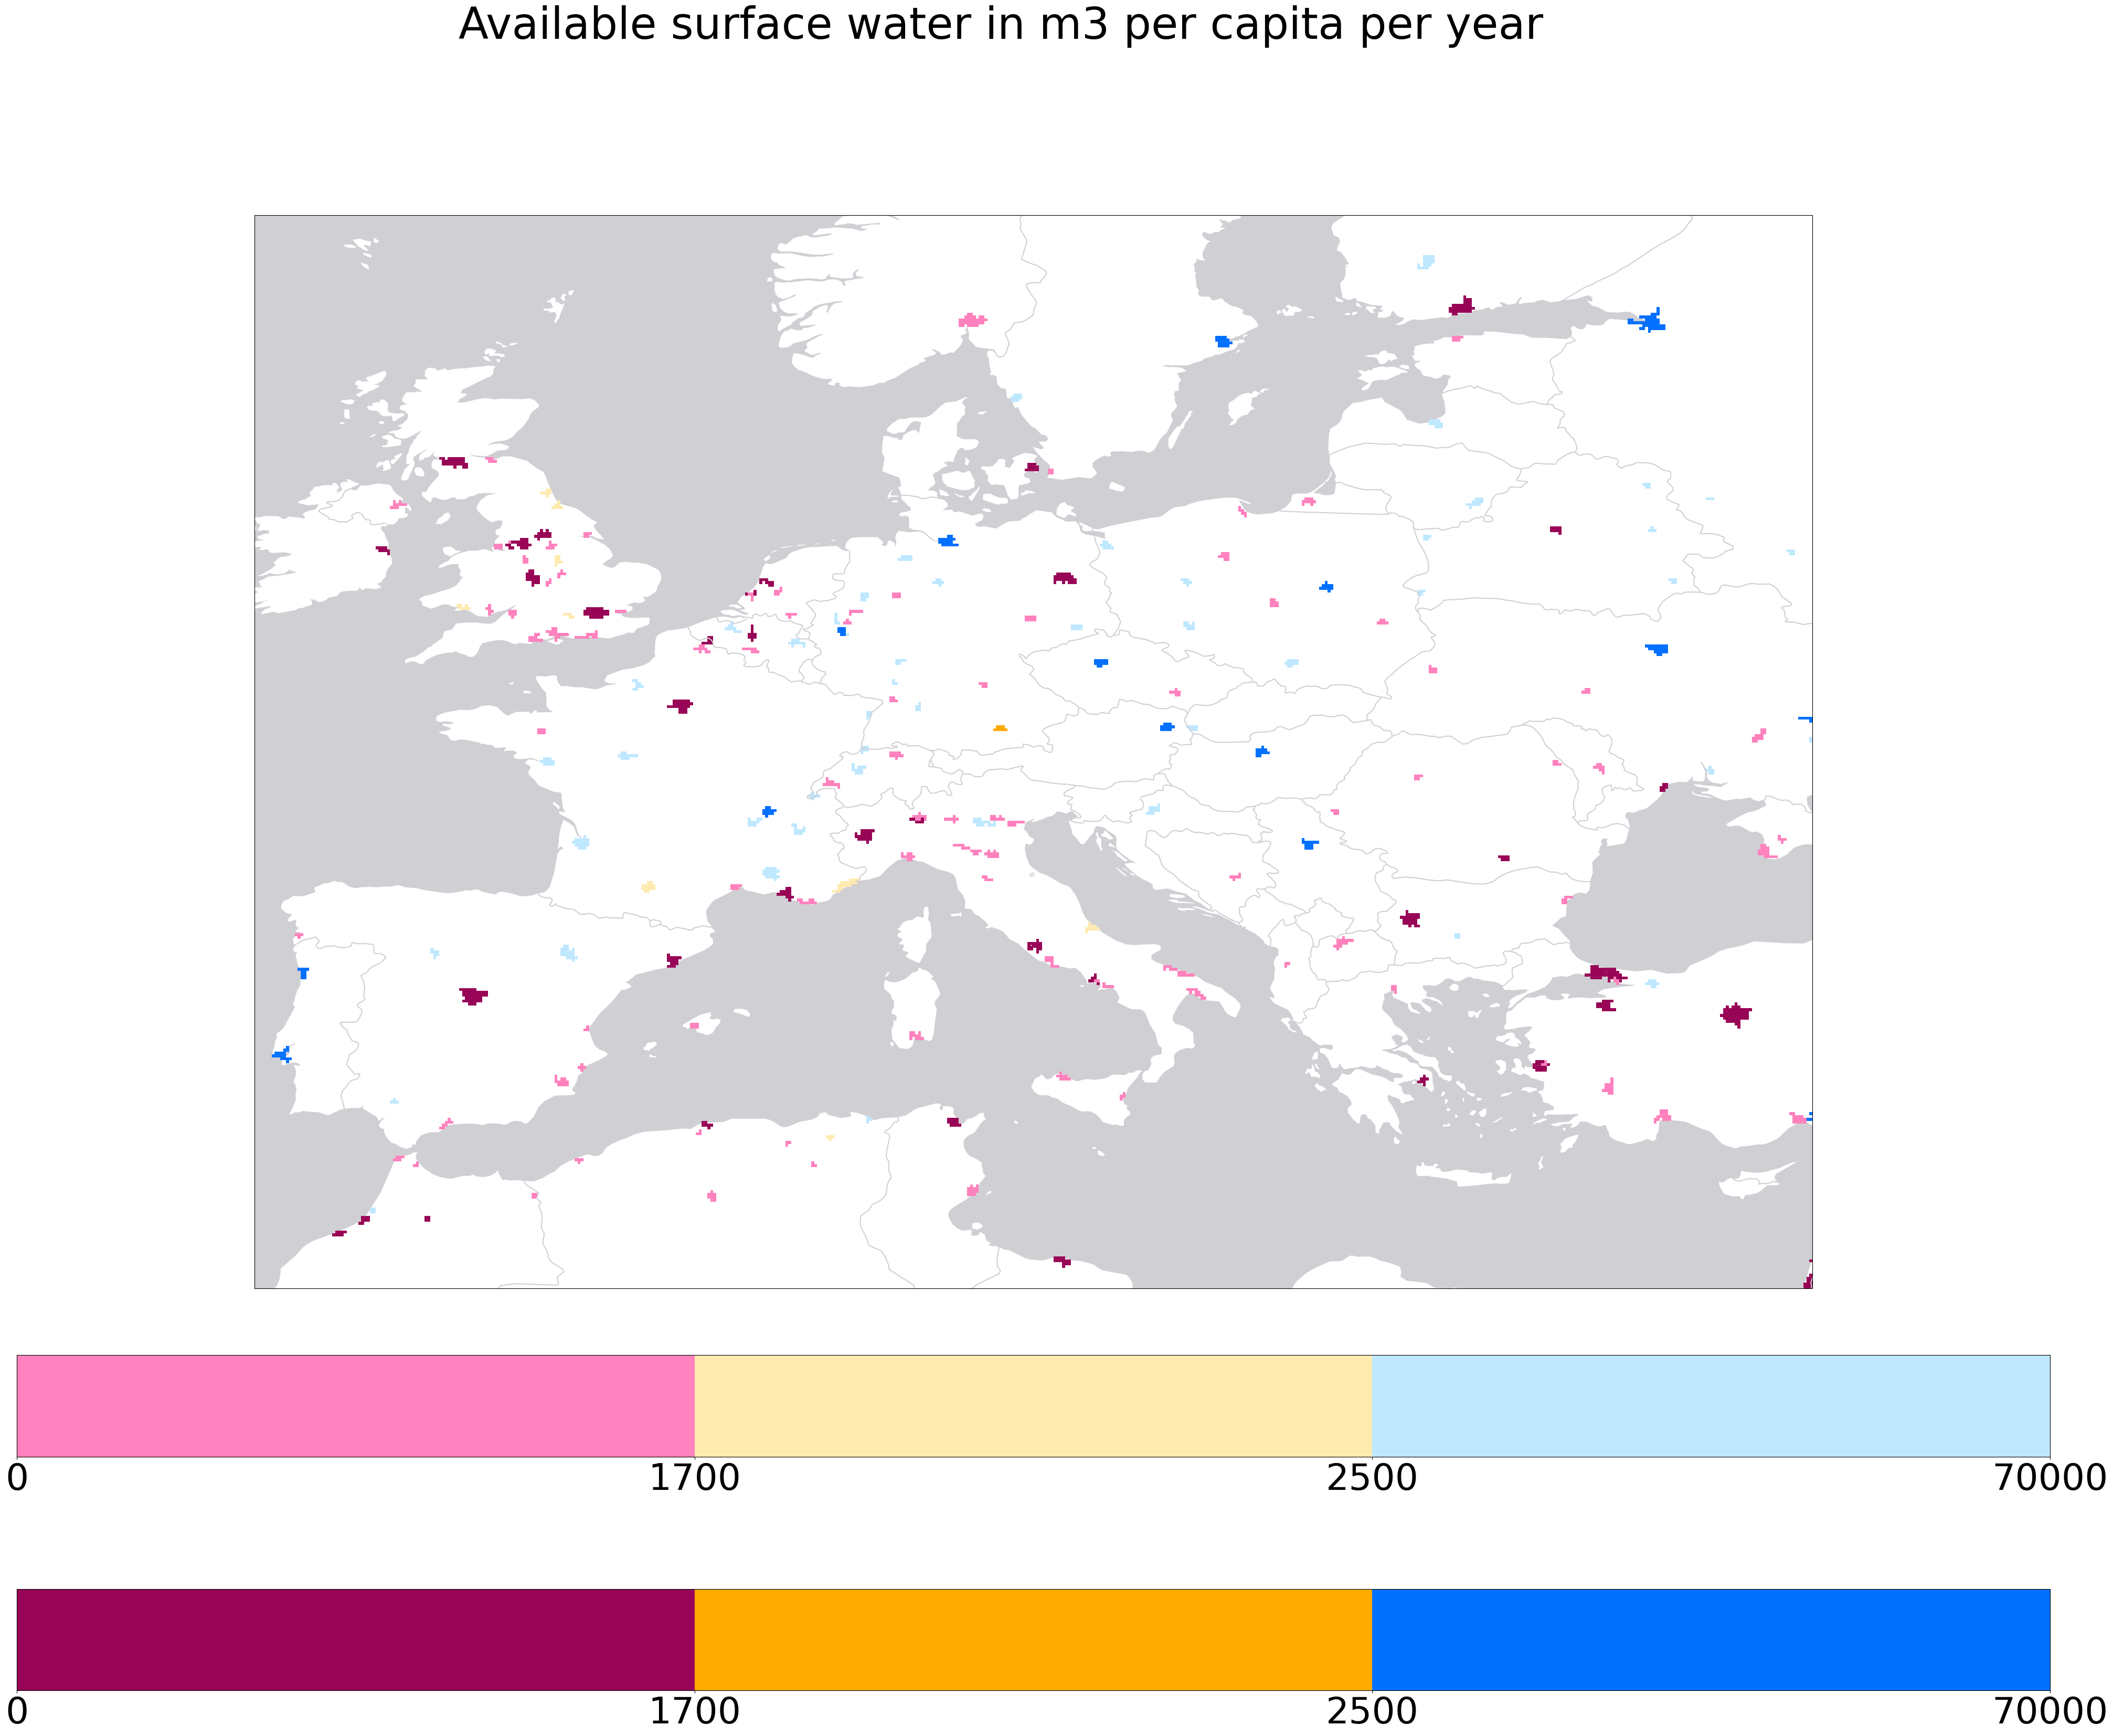

In [9]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-10, 35, 32, 63)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 1700, 2500, 70000]

masked_data_dark = np.ma.masked_where(pop_cropped <= threshold, region_masked)
masked_data_light = np.ma.masked_where(pop_cropped > threshold, region_masked)

light_colors = ['#ff81bd', '#ffebb0', '#bfe8ff']
dark_colors = ['#990556', '#ffaa01', '#0170fe']

cmap_dark = mcolors.ListedColormap(dark_colors)
norm_dark = mcolors.BoundaryNorm(bounds, len(dark_colors))
cmap_light = mcolors.ListedColormap(light_colors)
norm_light = mcolors.BoundaryNorm(bounds, len(light_colors))

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(masked_data_dark, 
              cmap= cmap_dark,
              norm = norm_dark,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
iml = ax.imshow(masked_data_light, 
              cmap= cmap_light,
              norm = norm_light,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
#ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
cbar = fig.colorbar(iml, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()

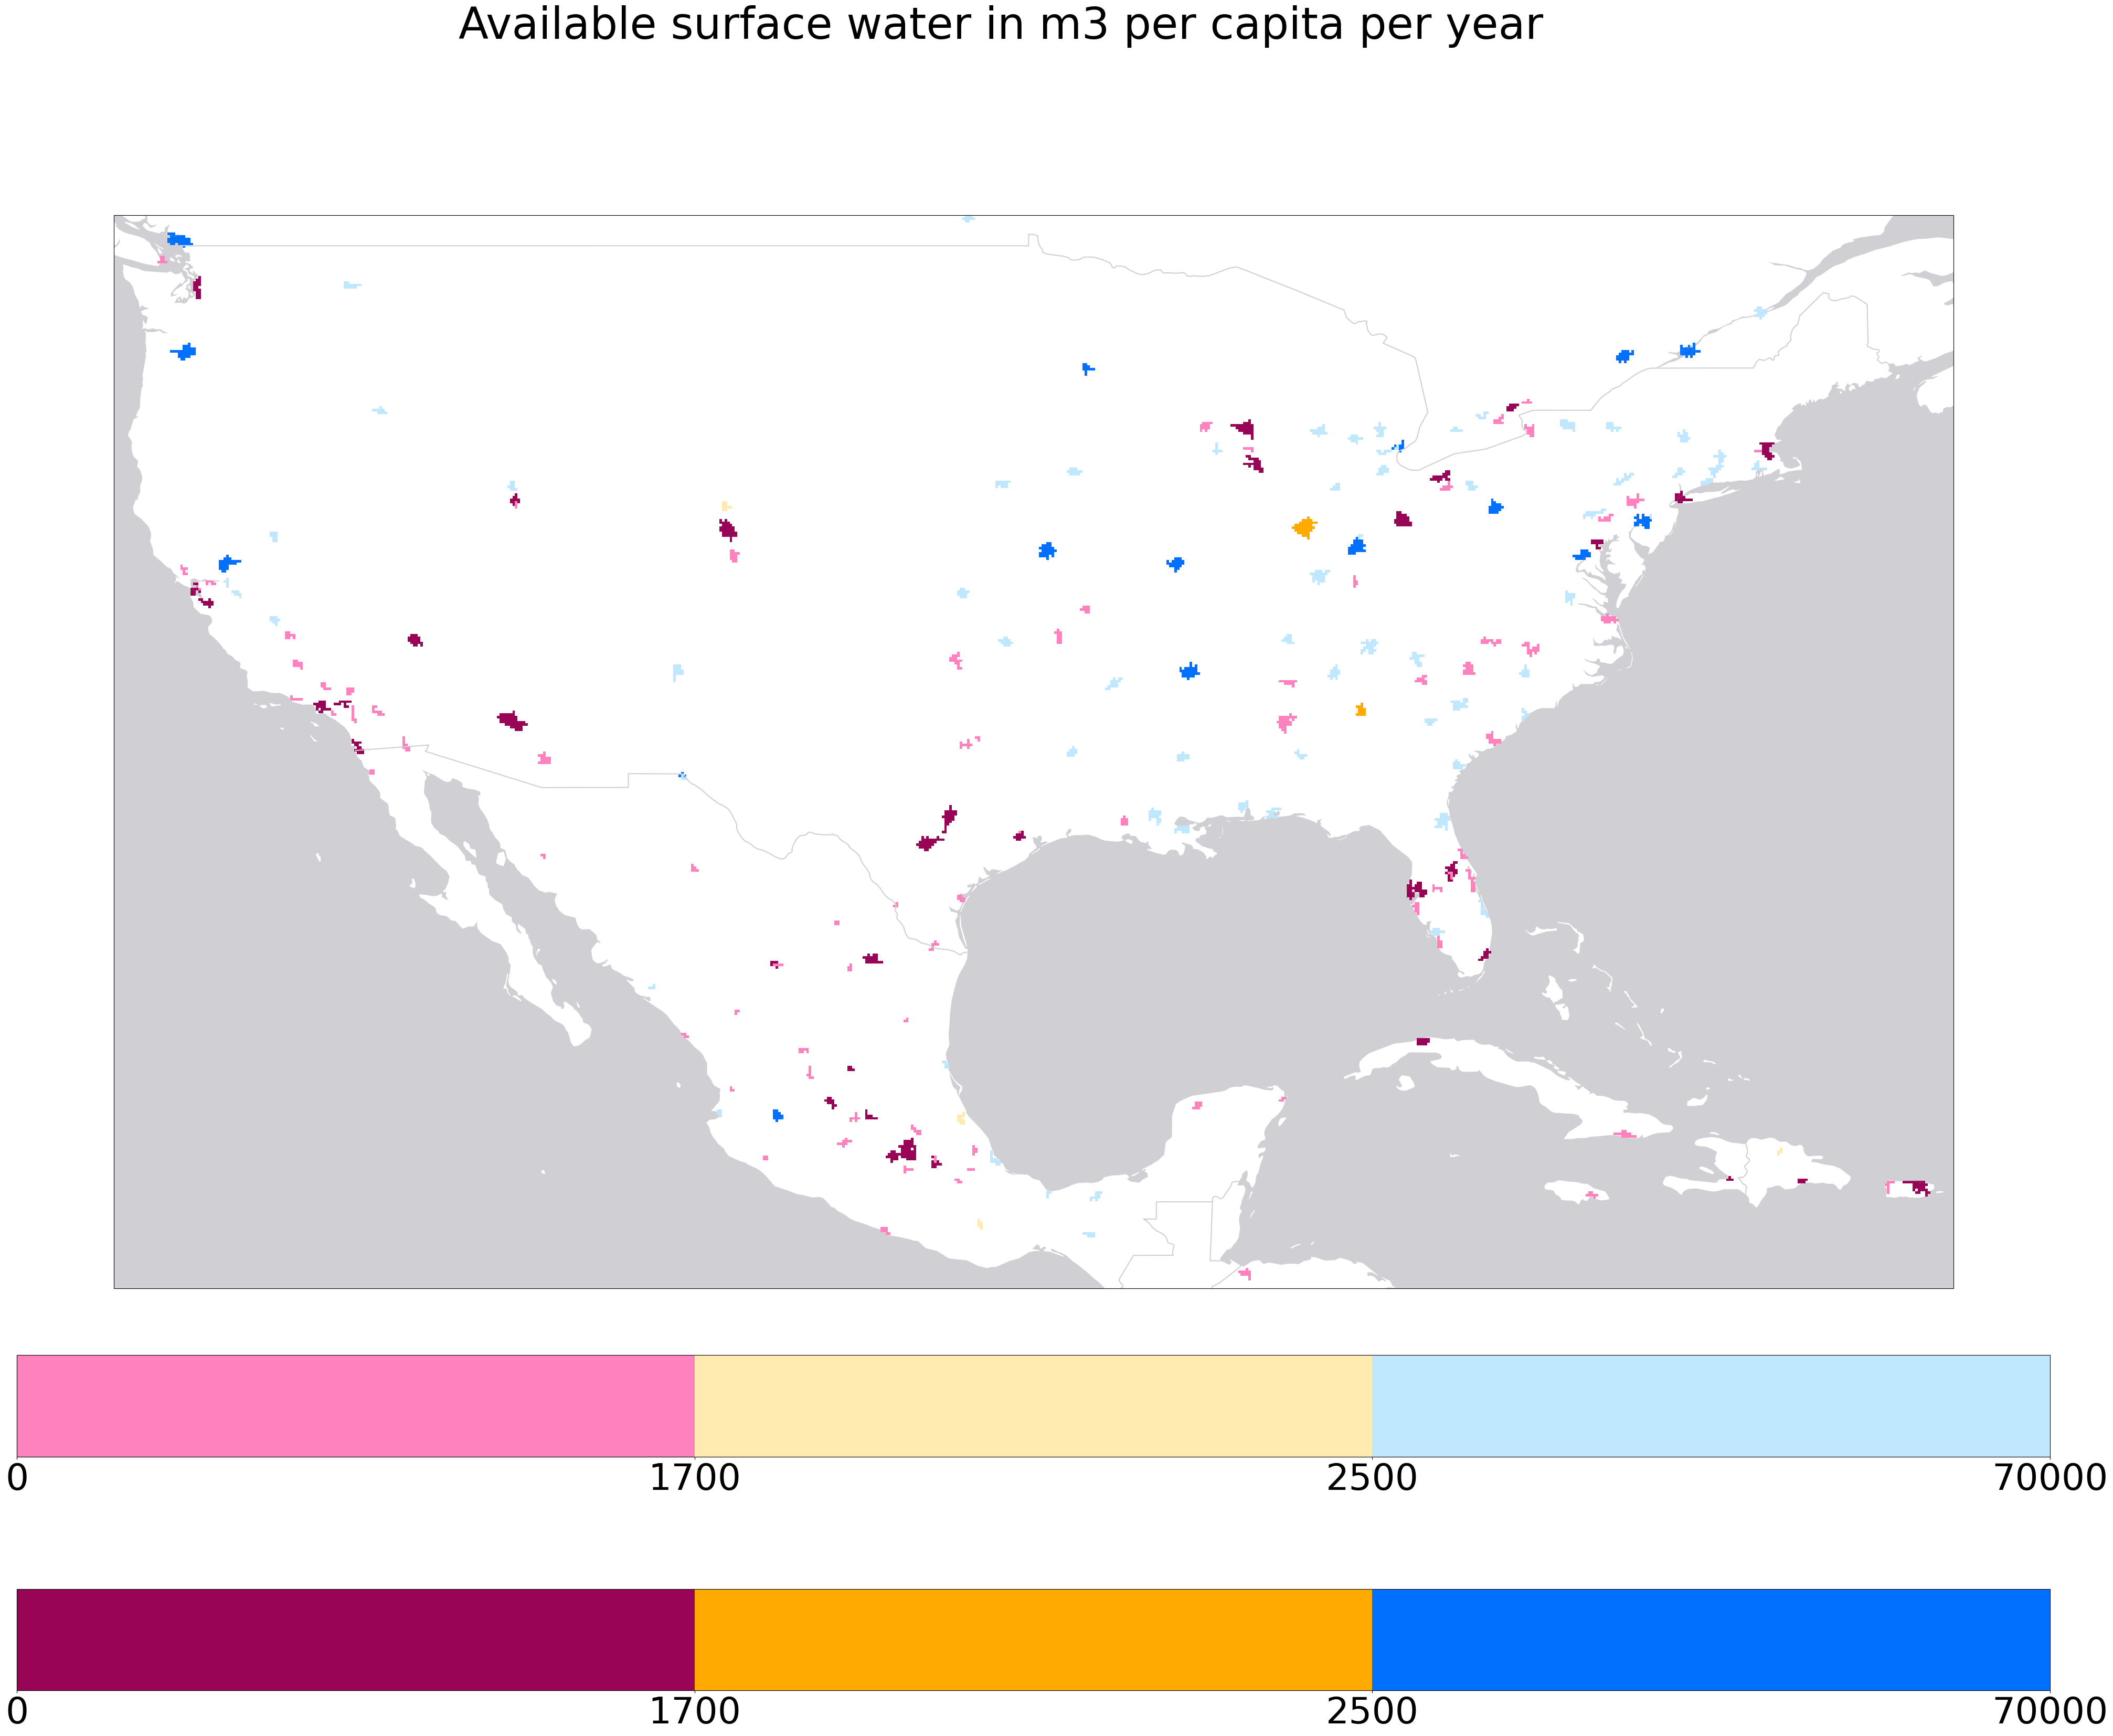

In [10]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(-125, -65, 15, 50)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 1700, 2500, 70000]

masked_data_dark = np.ma.masked_where(pop_cropped <= threshold, region_masked)
masked_data_light = np.ma.masked_where(pop_cropped > threshold, region_masked)

light_colors = ['#ff81bd', '#ffebb0', '#bfe8ff']
dark_colors = ['#990556', '#ffaa01', '#0170fe']

cmap_dark = mcolors.ListedColormap(dark_colors)
norm_dark = mcolors.BoundaryNorm(bounds, len(dark_colors))
cmap_light = mcolors.ListedColormap(light_colors)
norm_light = mcolors.BoundaryNorm(bounds, len(light_colors))

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(masked_data_dark, 
              cmap= cmap_dark,
              norm = norm_dark,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
iml = ax.imshow(masked_data_light, 
              cmap= cmap_light,
              norm = norm_light,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
cbar = fig.colorbar(iml, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()


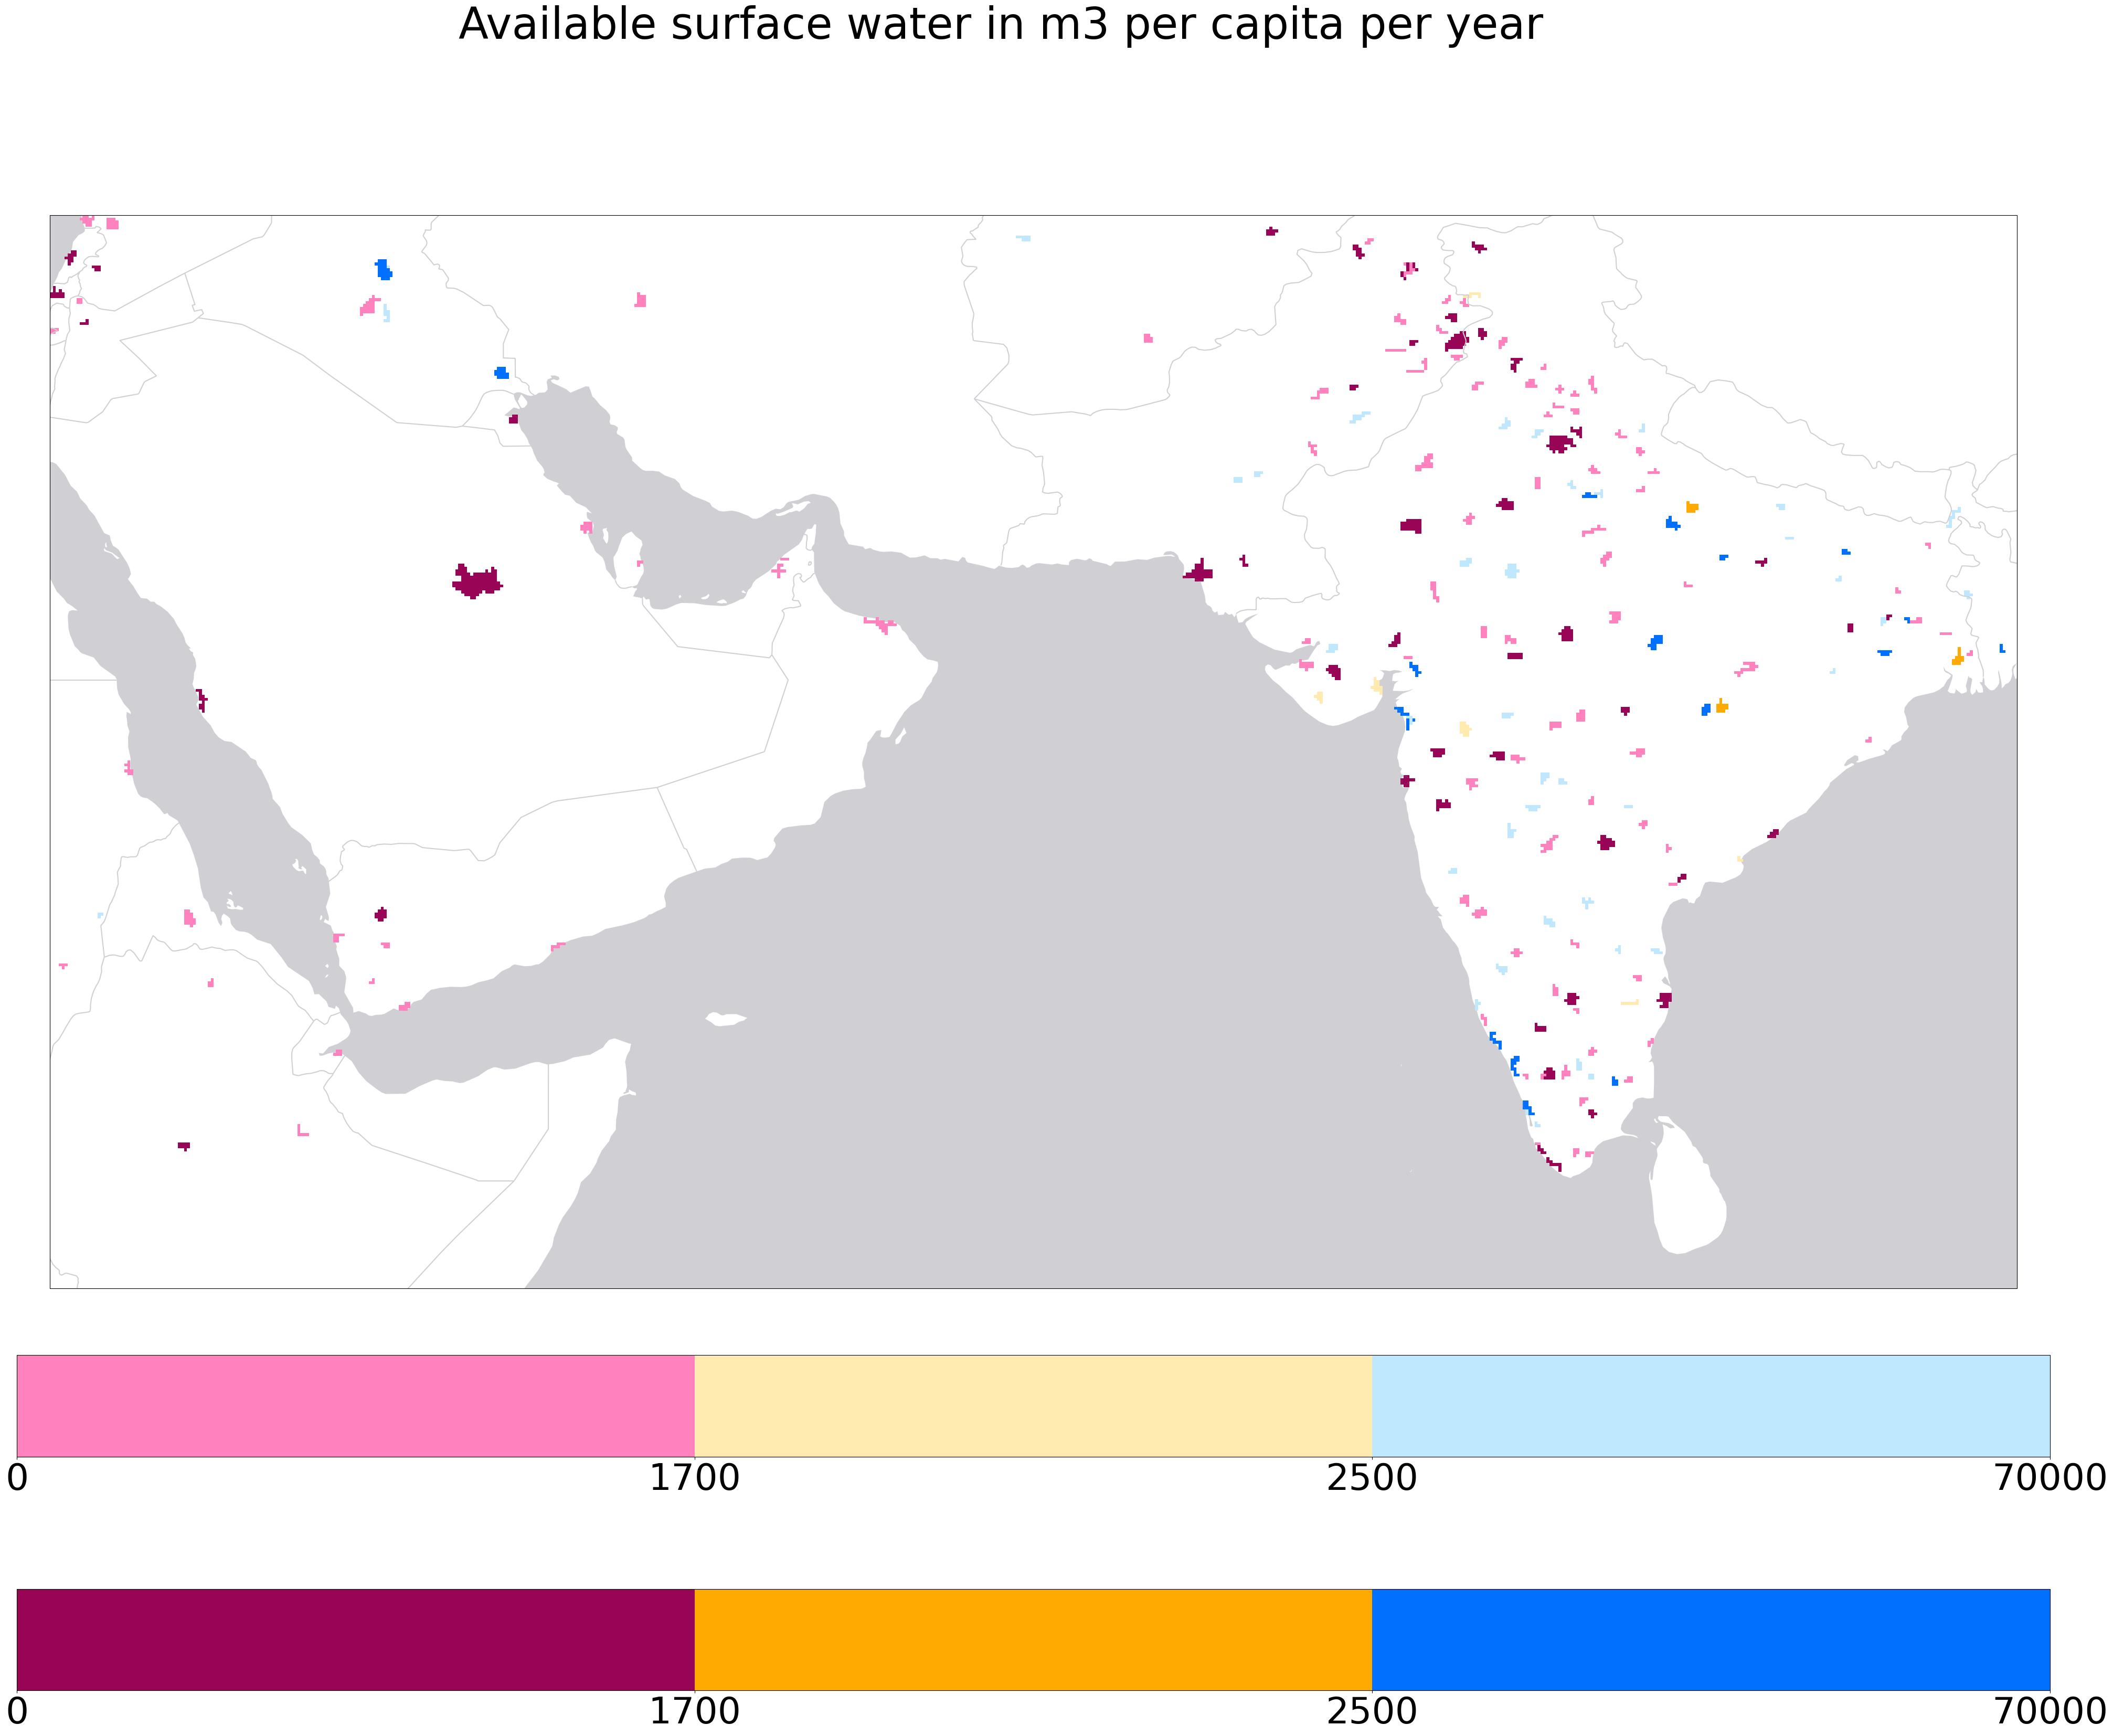

In [11]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(35, 90, 5, 35)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 1700, 2500, 70000]

masked_data_dark = np.ma.masked_where(pop_cropped <= threshold, region_masked)
masked_data_light = np.ma.masked_where(pop_cropped > threshold, region_masked)

light_colors = ['#ff81bd', '#ffebb0', '#bfe8ff']
dark_colors = ['#990556', '#ffaa01', '#0170fe']

cmap_dark = mcolors.ListedColormap(dark_colors)
norm_dark = mcolors.BoundaryNorm(bounds, len(dark_colors))
cmap_light = mcolors.ListedColormap(light_colors)
norm_light = mcolors.BoundaryNorm(bounds, len(light_colors))

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(masked_data_dark, 
              cmap= cmap_dark,
              norm = norm_dark,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
iml = ax.imshow(masked_data_light, 
              cmap= cmap_light,
              norm = norm_light,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
cbar = fig.colorbar(iml, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()


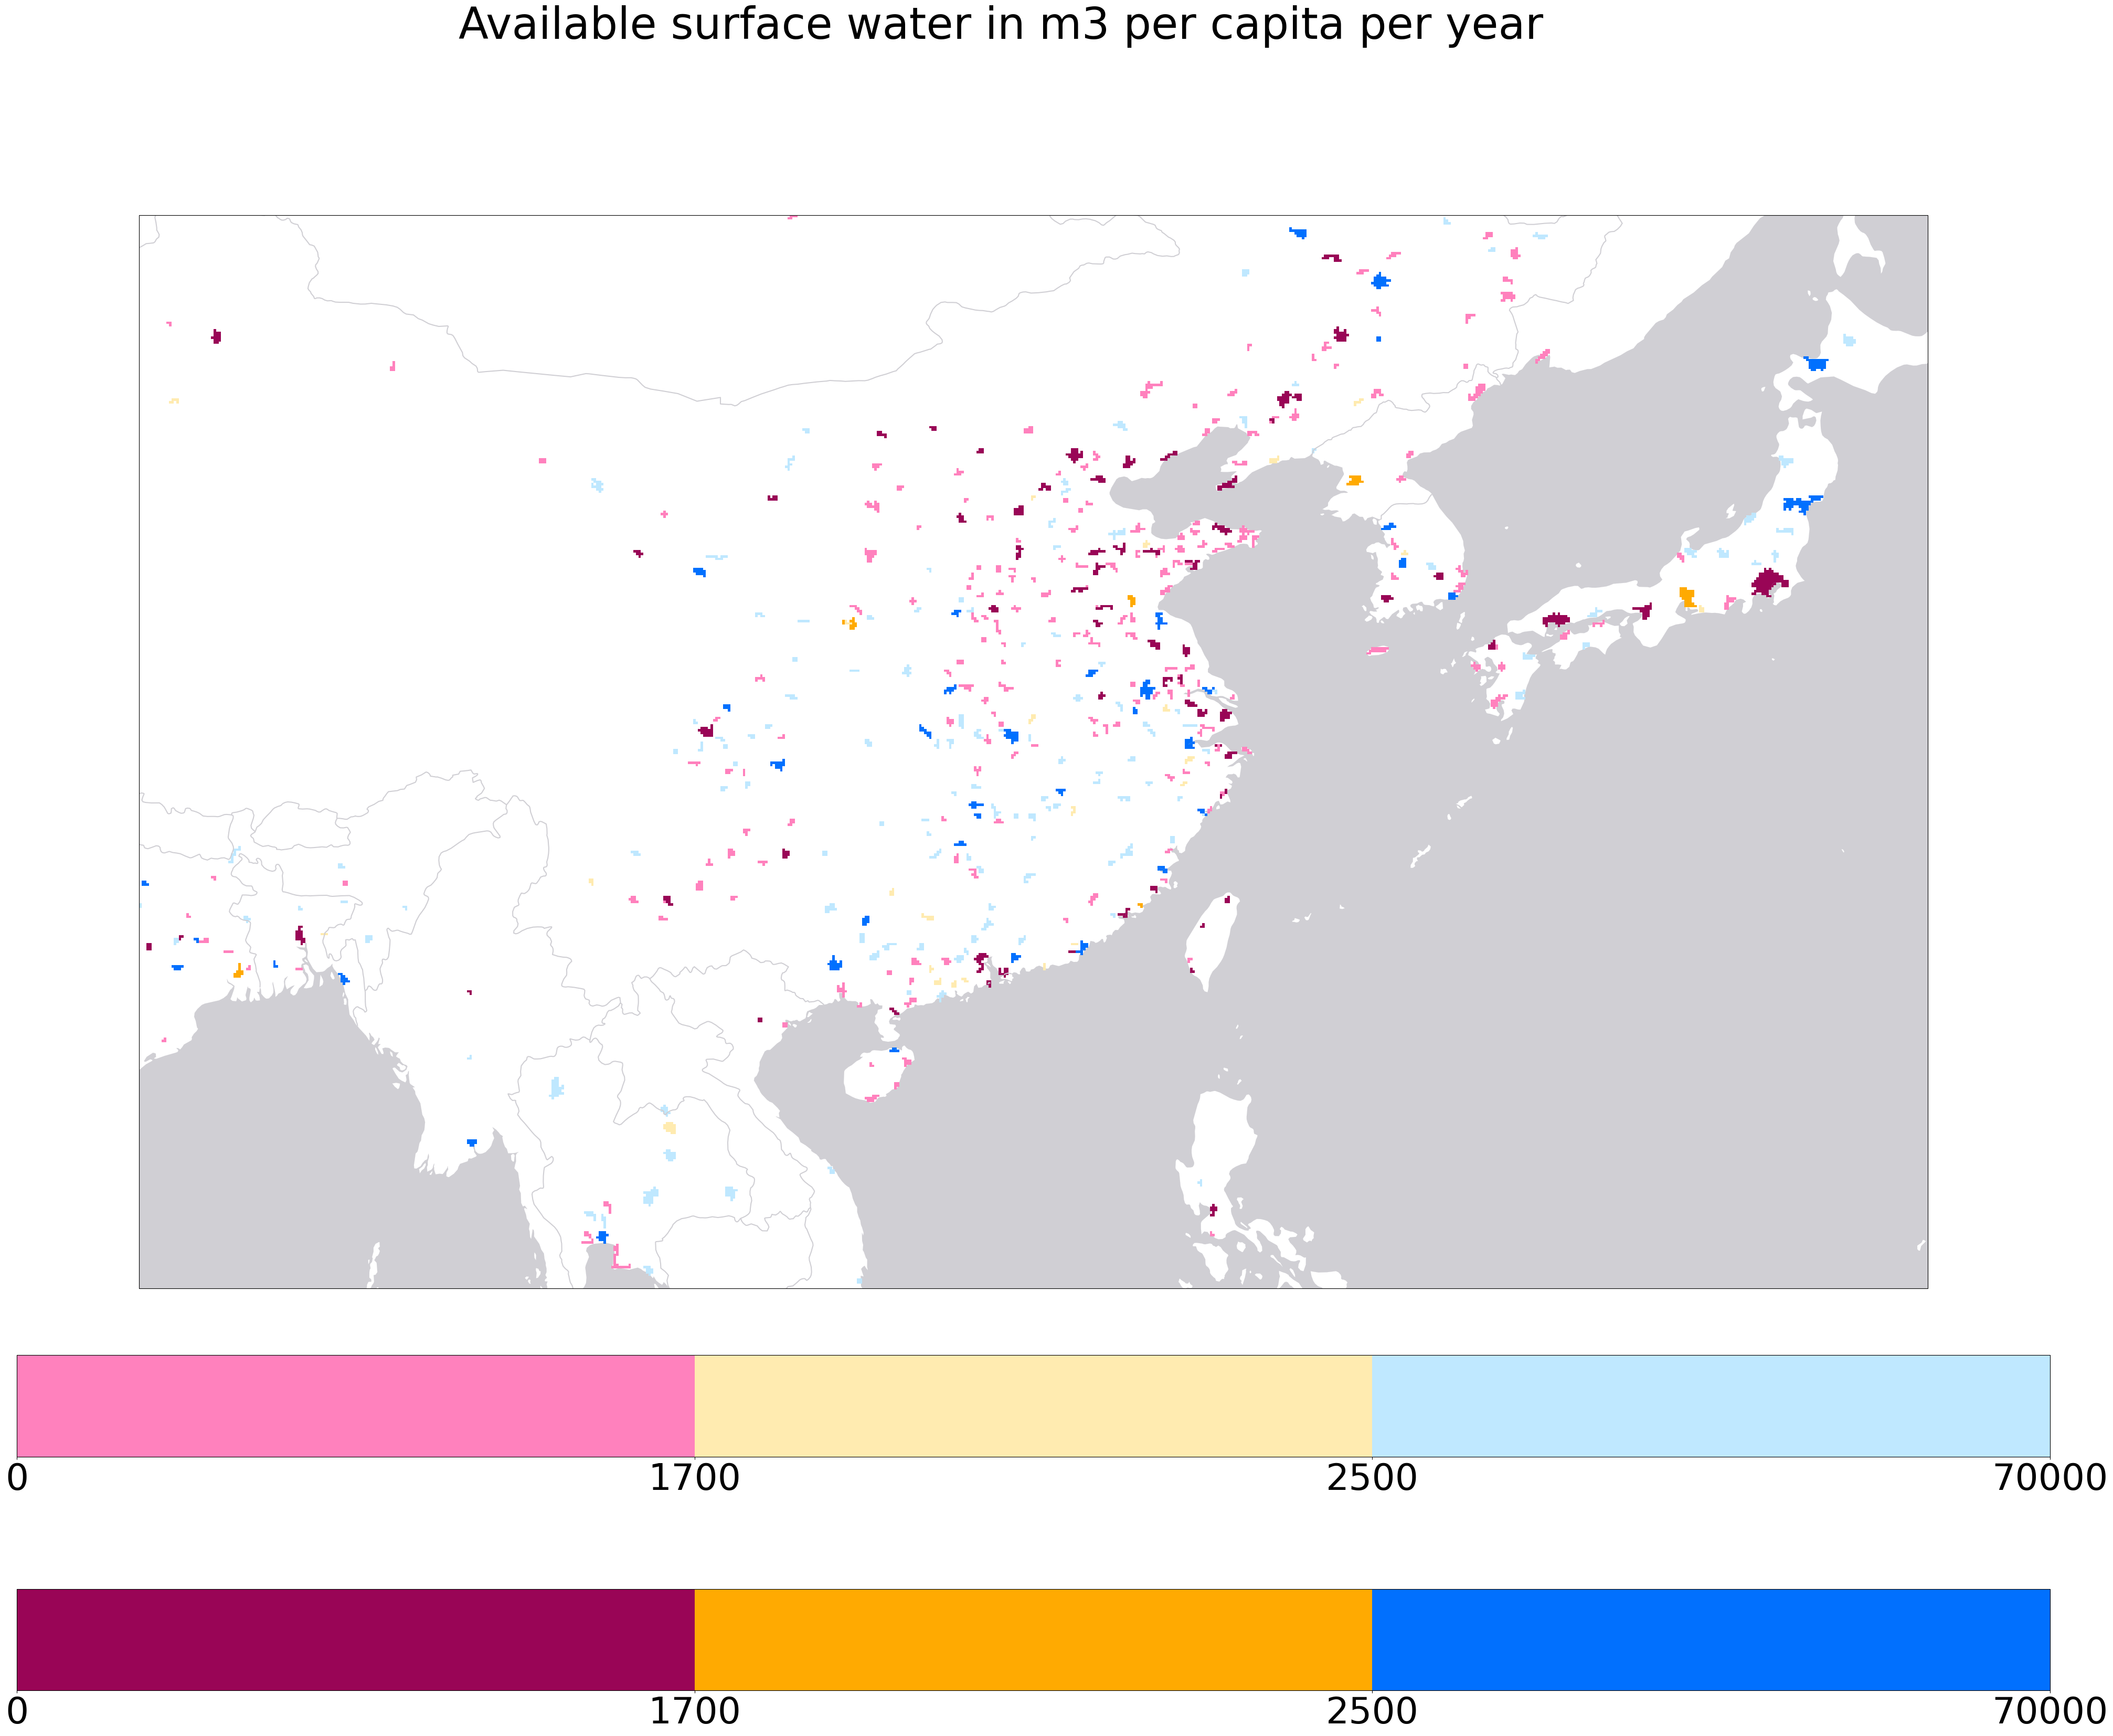

In [12]:
upperindex, lowerindex, leftindex, rightindex, rgnshape, img_extent = geography(85, 145, 12, 48)
region = citygrid_masked[upperindex:lowerindex, leftindex:rightindex]
region_masked = np.ma.masked_where(region==0, region)
pop_cropped = population[upperindex:lowerindex, leftindex:rightindex]

threshold = 1e6
bounds = [0, 1700, 2500, 70000]

masked_data_dark = np.ma.masked_where(pop_cropped <= threshold, region_masked)
masked_data_light = np.ma.masked_where(pop_cropped > threshold, region_masked)

light_colors = ['#ff81bd', '#ffebb0', '#bfe8ff']
dark_colors = ['#990556', '#ffaa01', '#0170fe']

cmap_dark = mcolors.ListedColormap(dark_colors)
norm_dark = mcolors.BoundaryNorm(bounds, len(dark_colors))
cmap_light = mcolors.ListedColormap(light_colors)
norm_light = mcolors.BoundaryNorm(bounds, len(light_colors))

plt.rcParams["font.size"] = 50
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(50,40), subplot_kw={'projection': projection})
imd = ax.imshow(masked_data_dark, 
              cmap= cmap_dark,
              norm = norm_dark,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
iml = ax.imshow(masked_data_light, 
              cmap= cmap_light,
              norm = norm_light,
              extent=img_extent,
              transform=ccrs.PlateCarree(), 
             )
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
cbar = fig.colorbar(imd, ax=ax, orientation='horizontal', pad=0.02)
cbar = fig.colorbar(iml, ax=ax, orientation='horizontal', pad=0.05)
fig.suptitle('Available surface water in m3 per capita per year')
plt.show()
